# Prosper Loan Data Exploration
## by Artyom Chernyaev

## Preliminary Wrangling

> This data set contains information on peer to peer loans facilitated by credit company Prosper

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Let's load data set and do some initial wrangling:

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
54096,FE173551091829922CFDB7F,600897,2012-06-18 07:22:27.297000000,NaN,36,Completed,2013-10-03 00:00:00,0.33973,0.2999,0.2899,...,-23.21,-7.69,0.0,0.0,0.0,1.0,0,0,0.0,55
103268,D7E93584165963354D511FE,844188,2013-07-18 21:49:57.410000000,NaN,36,Current,NaN,0.22712,0.1899,0.1799,...,-47.29,0.00,0.0,0.0,0.0,1.0,0,0,0.0,54
92504,6D60357878464328508B889,777447,2013-05-12 12:34:06.087000000,NaN,36,Completed,2013-08-02 00:00:00,0.25371,0.2159,0.2059,...,-4.73,0.00,0.0,0.0,0.0,1.0,0,0,0.0,25
14180,18B736011703000696F7063,1153944,2014-01-22 04:17:04.717000000,NaN,36,Current,NaN,0.14206,0.1139,0.1039,...,-10.19,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
84451,D40435435079648120604E3,570949,2012-03-22 09:14:52.737000000,NaN,60,Completed,2013-11-13 00:00:00,0.27246,0.2468,0.2368,...,-100.78,0.00,0.0,0.0,0.0,1.0,0,0,0.0,108


Note that this data set contains 81 columns. For the purpose of this analysis let's take only some of them:

In [90]:
target_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [91]:
target_df = df[target_columns]

In [92]:
target_df.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
102970,36,Chargedoff,0.3177,HR,19,Other,43.0,3500.000000,NaN,2000,2012-08-21 00:00:00,0,29
50029,36,Past Due (61-90 days),0.1980,C,1,Self-employed,6.0,4583.333333,NaN,15000,2013-10-21 00:00:00,0,1
101336,36,Chargedoff,0.1795,AA,3,Self-employed,0.0,8333.333333,1.0,10880,2010-03-08 00:00:00,1,253
45031,36,Chargedoff,0.2300,NaN,0,Full-time,0.0,3718.000000,NaN,11000,2007-03-02 00:00:00,0,214
4732,36,Completed,0.1620,B,1,Employed,24.0,4583.333333,NaN,2500,2013-10-02 00:00:00,0,1


In [93]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
DelinquenciesLast7Years      112947 non-null float64
StatedMonthlyIncome          113937 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
dtypes: float64(4), int64(5), object(4)
memory usage: 11.3+ MB


Since Prosper use their propriatery Prosper Rating only since 2009, we have a lot of missing values in ProsperRating column. Let's drop these missing values:

In [103]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Convert LoanOriginationDate to datetime datatype.

In [104]:
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])

In [105]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
index                        84853 non-null int64
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    84853 non-null int64
EmploymentStatus             84853 non-null object
DelinquenciesLast7Years      84853 non-null float64
StatedMonthlyIncome          84853 non-null float64
TotalProsperLoans            19797 non-null float64
LoanOriginalAmount           84853 non-null int64
LoanOriginationDate          84853 non-null datetime64[ns]
Recommendations              84853 non-null int64
Investors                    84853 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 9.1+ MB


According to [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) in case of no previous credit history on Prosper the value for column TotalProsperLoans will be NaN, let's replace it with 0.

In [106]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

In [107]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
index                        84853 non-null int64
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerRate                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    84853 non-null int64
EmploymentStatus             84853 non-null object
DelinquenciesLast7Years      84853 non-null float64
StatedMonthlyIncome          84853 non-null float64
TotalProsperLoans            84853 non-null float64
LoanOriginalAmount           84853 non-null int64
LoanOriginationDate          84853 non-null datetime64[ns]
Recommendations              84853 non-null int64
Investors                    84853 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 9.1+ MB


### What is the structure of your dataset?

> There are 84853 listings for loans in peer-to-peer credit company Prosper. Original data set has 81 variables i selected 13 from them. They are LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors. Most of the variables are numeric however there is some exceptions:
<ul>
    <li>LoanStatus - categorical variable</li>
    <li>ProsperRating (Aplha) ordinal categorical variable with the following values from higher to lower ('AA', 'A', 'B', 'C', 'D', 'E', 'HR')</li>
    <li>EmploymentStatus - categorical variable</li>
    <li>LoanOriginationDate - timestamp</li>
</ul>

### What is/are the main feature(s) of interest in your dataset?

> I will try to figure out what features can be used to predict default on credit.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the borrowers Prosper rating will have the highest impact on chances of default. Also I expect that stated monthly income, number of delinquencies variables will play a major role.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [13]:
default_color = sb.color_palette()[0]

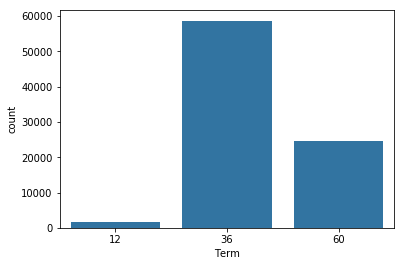

In [14]:
sb.countplot(data = target_df, x = 'Term', color = default_color)

For loan terms there are three options: 36, 60 and 12. Most common is 36 months. Next, Loan status.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

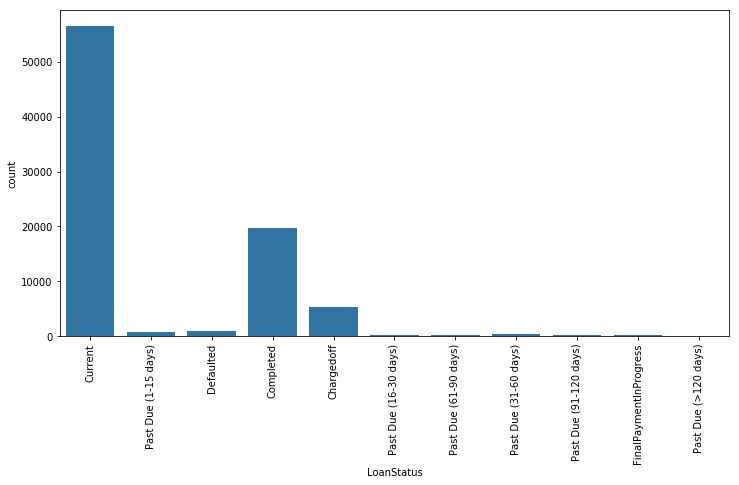

In [15]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = target_df, x = 'LoanStatus', color = default_color)

Most of the loans in the data set are actually current loans. Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount. Past due loans are split in several groups based on the length of payment delay. Up next - Borrower Rate.

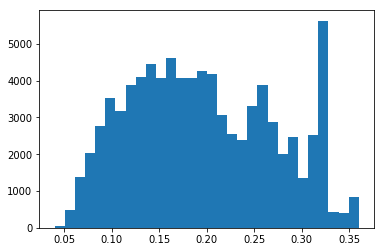

In [16]:
plt.hist(data=target_df, x='BorrowerRate', bins=30);

The distribution of the borrower rate apears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurences:

In [17]:
target_df.BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3199    1645
Name: BorrowerRate, dtype: int64

Turns out two most common rates are 0.3177 and 0.3199. Let's check Prosper Rating next.

Because Prosper Rating is ordinal categorial type in nature (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [18]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']


ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
target_df['ProsperRating (Alpha)'] = target_df['ProsperRating (Alpha)'].astype(ordered_var)

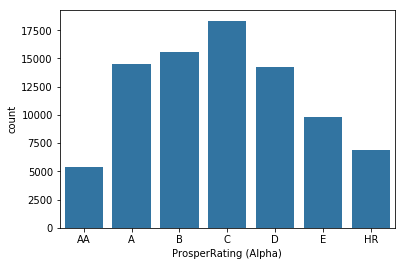

In [19]:
sb.countplot(data=target_df, x='ProsperRating (Alpha)', color=default_color)

Interestingly enough ratings are almost normaly distrubuted with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan.

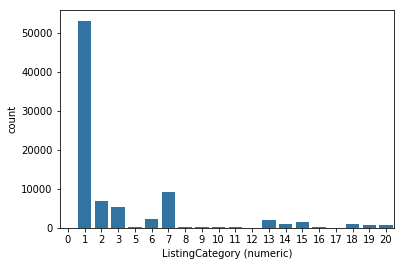

In [20]:
sb.countplot(data=target_df, x='ListingCategory (numeric)', color=default_color)

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The overwhelming majority of loans are used for debt consolidation. Other notable categories include Other, Home Improvement and Business. Next variable - Employment Status.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

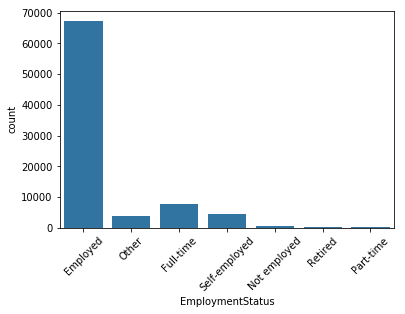

In [22]:
sb.countplot(data=target_df, x='EmploymentStatus', color=default_color)
plt.xticks(rotation=45)

The majority of borrowers are employed, all other categories constitute only small part of borrowers. Let's move to the DelinquenciesLast7Years variable.

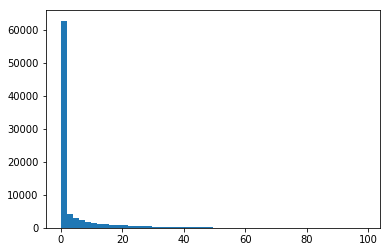

In [32]:
plt.hist(data=target_df, x='DelinquenciesLast7Years', bins=50);

Most of the Prosper clients has 0 delinquencies for the last 7 years, a small minority has up to 20 delinquencies and very tiny group had more than 20 but less than 100 delunquencies. Next let's see at StatedMonthlyIncome.

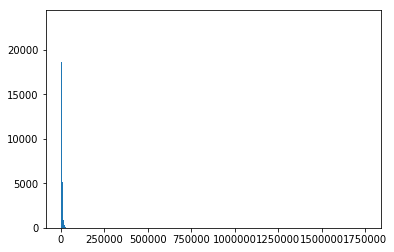

In [52]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);

Distribution of stated montly income is higly skewed to the right. Let's check how many outliers we have:

In [53]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

245

Let's check montly income a little bit closer:

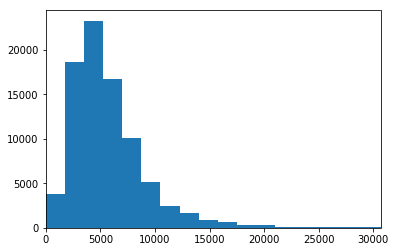

In [61]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);

With a boundary of mean + three standard deviations distribution of montly income looks aproxamitly normal with noticeable right skew. Next step - TotalProsperLoans

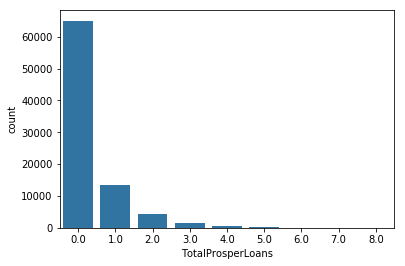

In [63]:
sb.countplot(data=target_df, x='TotalProsperLoans', color=default_color);

For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 8 loans. Next step - LoanOriginalAmount

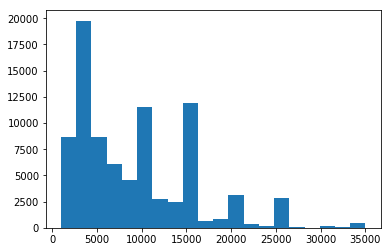

In [69]:
plt.hist(data=target_df, x='LoanOriginalAmount', bins=20);

It looks like most of the loans are below 15 thousand range and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000 etc. Let's move on to LoanOriginationDate

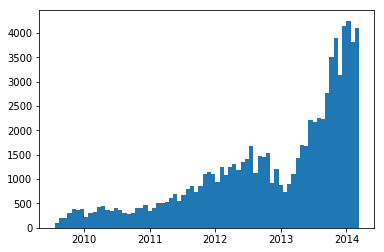

In [83]:
plt.hist(data=target_df, x='LoanOriginationDate', bins=72);

We can clearly see a substansial growth for number of loans from the start of 2013. Next item - Recommendations.

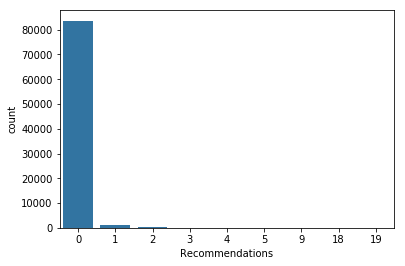

In [85]:
sb.countplot(data=target_df, x='Recommendations', color=default_color);

Overwhelming majority of loans obtained without recomendations. Next let's dig into InvestmentFromFriendsAmount

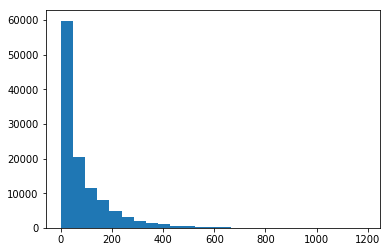

In [99]:
plt.hist(data=target_df, x='Investors', bins=25);

Most loans have only one investor and majority less than 200 investors but some outliers have about 1200 inverstors.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!